In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

plt.style.use('ggplot')

In [4]:
# Load data from file
data = pd.read_csv('Adops & Data Scientist Sample Data - Q2.csv', header = None)
data.columns = ['A','B','C']

In [8]:
# Inspect dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
A    300 non-null float64
B    300 non-null float64
C    300 non-null float64
dtypes: float64(3)
memory usage: 7.1 KB


In [9]:
# Show summary stats
data.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


### Data Cleaning and Pre-processing

In [10]:
# Count missing values by column
data.isnull().sum()

A    0
B    0
C    0
dtype: int64

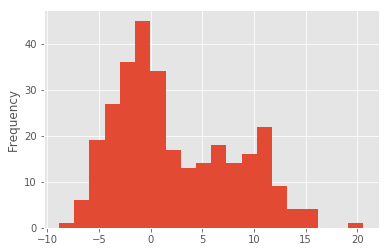

In [11]:
data['A'].plot.hist(bins=20)

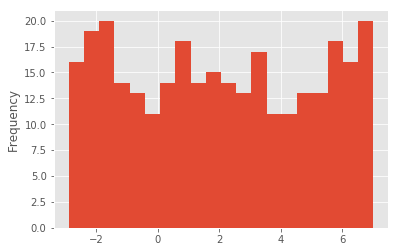

In [12]:
data['B'].plot.hist(bins=20)

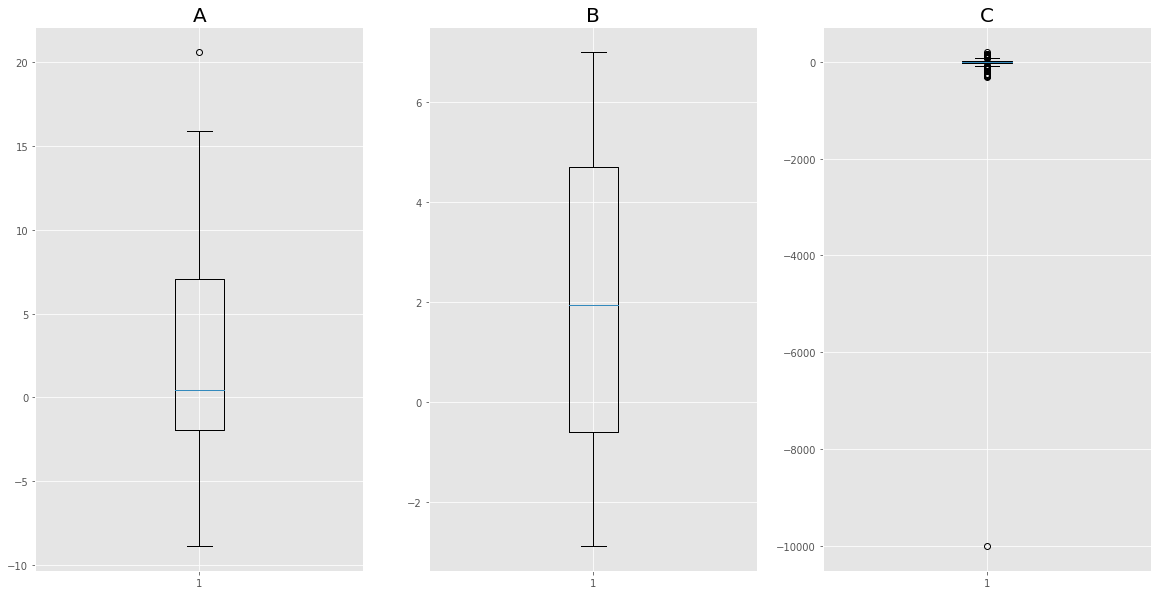

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.boxplot(df.A)
plt.title('A',fontsize=20)
plt.subplot(1, 3, 2)
plt.boxplot(df.B)
plt.title('B',fontsize=20)
plt.subplot(1, 3, 3)
plt.boxplot(df.C)
plt.title('C',fontsize=20)
plt.show()

Text(0.5, 0, '$C$')

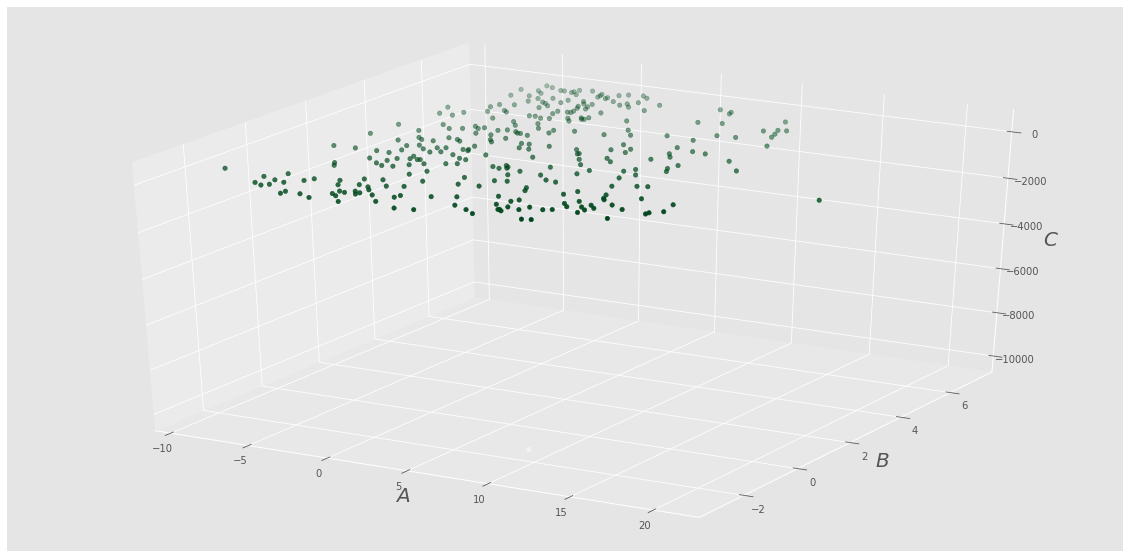

In [27]:
ax = plt.axes(projection='3d')

C = data.C.values
A = data.A.values
B = data.B.values
ax.scatter3D(A, B, C, c=C, cmap='Greens')
ax.set_xlabel('$A$', fontsize=20)
ax.set_ylabel('$B$', fontsize=20)
ax.set_zlabel('$C$', fontsize=20)

There is one point in C to be considered as outlier. Since I don't have enough background information about the dataset, I'm not sure what can be done to deal with this outlier in response variable. I decide to remove it from the original dataset. In real-world datasets, this cannot be done directly. Based on the background of data, methods for data collection, and size of data, we should try to transfrom the outliers instead of just remove it.

In [25]:
# remove outliers
data_clean = data[data.C != data.C.min()]

Text(0.5, 0, '$C$')

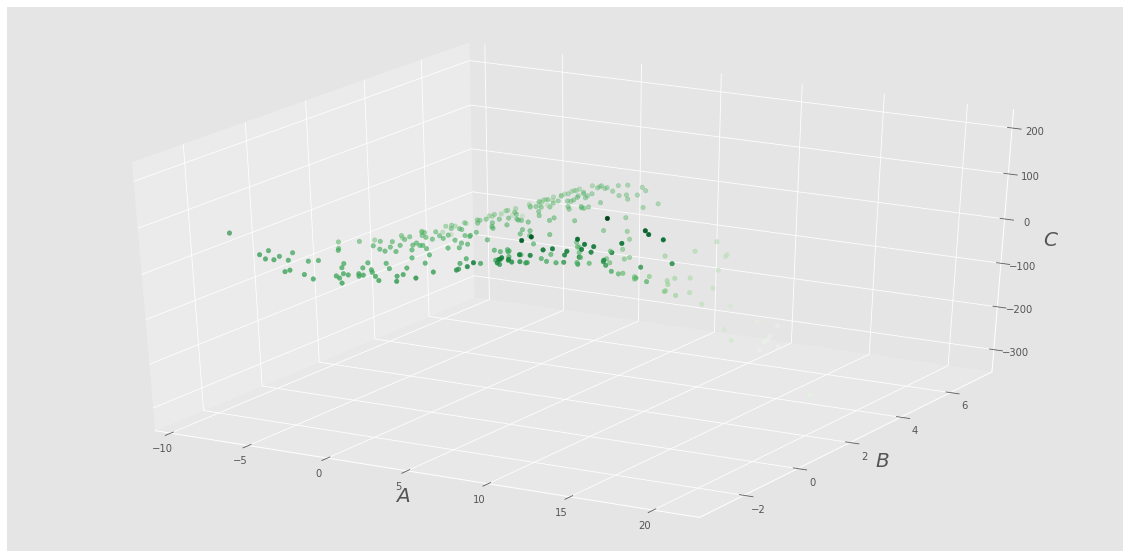

In [29]:
ax = plt.axes(projection='3d')

C = data_clean.C.values
A = data_clean.A.values
B = data_clean.B.values
ax.scatter3D(A, B, C, c=C, cmap='Greens')
ax.set_xlabel('$A$', fontsize=20)
ax.set_ylabel('$B$', fontsize=20)
ax.set_zlabel('$C$', fontsize=20)

### Build the Model

The computeCost function takes X,y and theta as parameters and computes the cost. Basically, “inner” calculates the dot product of X and theta raised to power two. Then they are summed up and divided by 2*length of X and returned. What it means is that we find the difference between predicted values (we use line equation and theta values to predict yhat) and the original y values (already in the data set) and sum them up. Then we find the average and return it. The returned value is the cost.
Gradient Descent is used to minimize cost function. It finds the optimum value for theta parameters in order to let  the cost decreases.

The model can be shown as this:

$$C = \theta_0 + \theta_1 A + \theta_2 B$$$$Y = \theta ^ T X$$$$Y = C$$$$\theta = [\theta_0, \theta_1, \theta_2]$$



In [42]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost[i] = computeCost(X, y, theta)
    return (theta, cost)

In [89]:
X = data_clean.iloc[:, 0:2] # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1]) # create a array containing only ones 
X = np.concatenate((ones, X),1) # cocatenate the ones to X matrix
y = data_clean.iloc[:, 2:3].values # create the y matrix

alpha = 0.01
iters = 1000

# theta is a row vector
theta = np.zeros([1,3])

In [90]:
# t is calculated in the form of [theta0, theta1, theta2]
t, cost = gradientDescent(X, y, theta, alpha, iters)
print(t)

[[ 25.62827002  -1.36092271 -15.20575852]]


Text(0, 0.5, 'Cost')

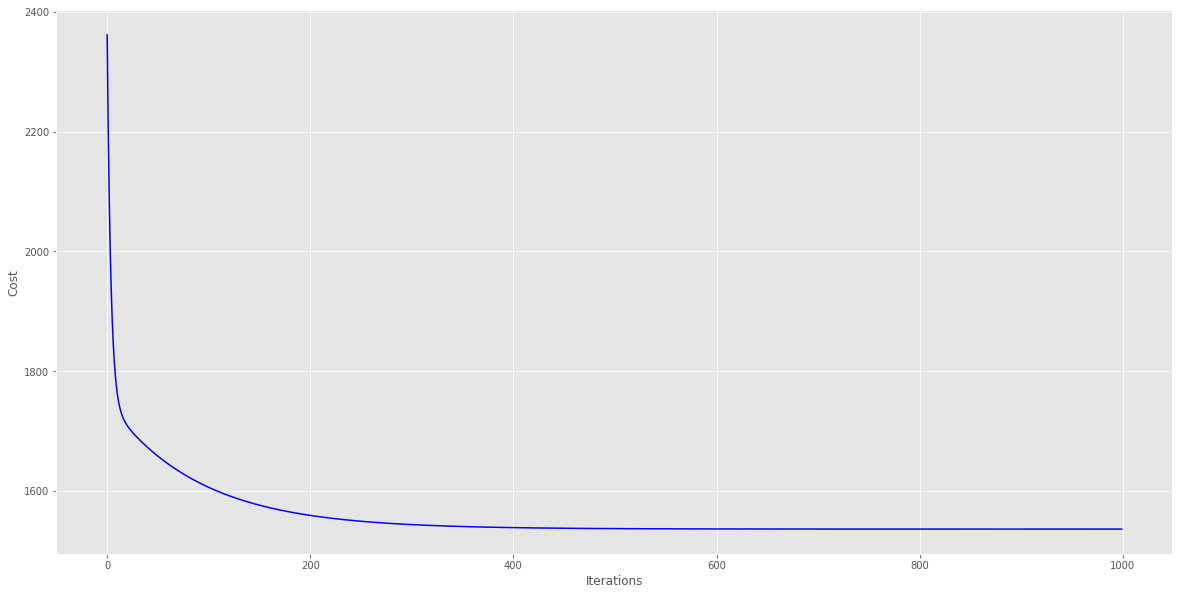

In [91]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters),cost, 'b')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')

In [92]:
def r2_score(y, y_pred):
    mean_y = np.mean(y)
    sst = sum((y - mean_y) ** 2)
    sse = sum((y - y_pred) ** 2)
    r2 = 1 - (sse / sst)
    return r2.item()

In [93]:
y_pred = X.dot(t.T) # get estimated y

r2 = r2_score(y,y_pred)
print('R2 score is',r2)

R2 score is 0.3940209976851361


From the data visualization at begining, I noticed that data A isn't a flat line. So polynomial terms might be needed. Thus, I decided to add a quadratic term $A^2$ and run the model again.

Since A is in the range [-10,20]. The squared values can be relatively high. Normal standarization is needed for A.

In [103]:
X = data_clean.iloc[:,0:2] # get A and B
X['A'] = (X['A'] - X['A'].mean())/(X['A'].std()) # standardize
X['A2'] = X['A']**2 # add quadratic term
ones = np.ones([X.shape[0],1]) # constant
X = np.concatenate((ones,X),axis=1) # combine constant with explanatory variables

theta = np.zeros([1,4])

/Users/xinyaliu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [105]:
t, cost = gradientDescent(X, y , theta, alpha, iters)
print(t)

[[ 31.70213486  -2.8089481  -15.43532625  -9.08358036]]


In [106]:
y_pred_squared = X.dot(t.T) # get estimated y

r2 = r2_score(y,y_pred_squared)
print('R2 score is',r2)

R2 score is 0.4137032191080714


$R^2$ score is increased after adding squared term. For further improvement, consider higher-order multivariate linear regression.